In [44]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time

In [2]:
lfw=datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)

In [3]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
lfw["data"].shape

(1140, 1850)

In [5]:
lfw["target"].shape

(1140,)

In [6]:
lfw["images"].shape

(1140, 50, 37)

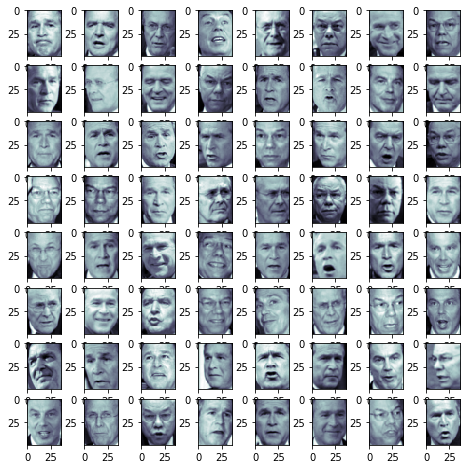

In [7]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(lfw["images"][i],cmap=plt.cm.bone)
plt.show()    

In [8]:
x=lfw.data
y=lfw.target

In [31]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,random_state=0)

In [32]:
pca=PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
pca.components_.shape

(855, 1850)

In [34]:
pca.explained_variance_.shape

(855,)

In [35]:
k=0
var=0
total=sum(pca.explained_variance_)
while var/total<0.99:
    var+=pca.explained_variance_[k]
    k=k+1
k    

316

In [45]:
pca=PCA(n_components=k)
x_transforme=pca.fit_transform(x_train)
x_transforme.shape
x_data=x_transforme
x_test_pca=pca.transform(x_test)

In [37]:
pca.components_.shape


(316, 1850)

In [38]:
pca.explained_variance_.shape

(316,)

In [39]:
x_original=pca.inverse_transform(x_transforme)
x_original.shape

(855, 1850)

In [40]:
xx=x_original.reshape((855,50,37))

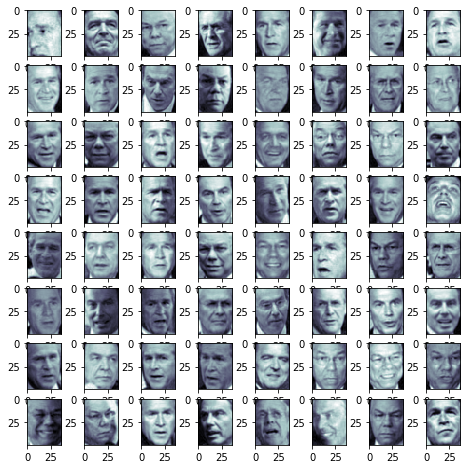

In [41]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(xx[i],cmap=plt.cm.bone)
plt.show()

In [42]:
a=pca.components_
a.shape

(316, 1850)

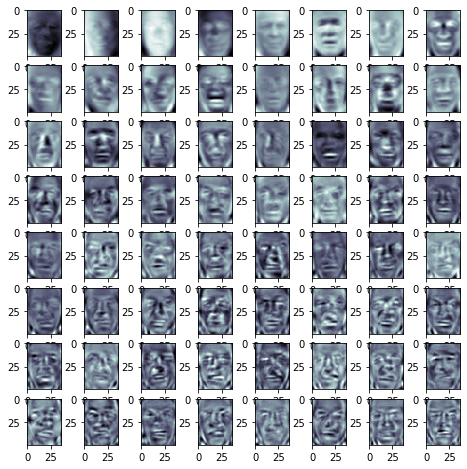

In [43]:
#eigenfaces
aa=a.reshape(316,50,37)
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(aa[i],cmap=plt.cm.bone)
plt.show()


In [52]:
cls=ensemble.RandomForestClassifier()
start=time.time()
cls.fit(x_train,y_train)
print(time.time()- start)
y_predict=cls.predict(x_test)
print(classification_report(y_predict,y_test))
print(confusion_matrix(y_test,y_predict))

0.16457176208496094
              precision    recall  f1-score   support

           0       0.57      0.64      0.60        55
           1       0.33      0.46      0.39        26
           2       0.90      0.63      0.74       174
           3       0.19      0.40      0.26        15
           4       0.23      0.53      0.32        15

    accuracy                           0.60       285
   macro avg       0.45      0.53      0.46       285
weighted avg       0.71      0.60      0.64       285

[[ 35   4  20   1   1]
 [  6  12  14   1   3]
 [  9   2 110   0   1]
 [  2   5  16   6   2]
 [  3   3  14   7   8]]


C:\Users\nidhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [53]:
#after applying PCA
cls=ensemble.RandomForestClassifier()
start=time.time()
cls.fit(x_data,y_train)
print(time.time()- start)
y_predict=cls.predict(x_test_pca)
print(classification_report(y_predict,y_test))
print(confusion_matrix(y_test,y_predict))


0.08882856369018555
              precision    recall  f1-score   support

           0       0.49      0.49      0.49        61
           1       0.08      0.21      0.12        14
           2       0.87      0.55      0.68       191
           3       0.16      0.71      0.26         7
           4       0.14      0.42      0.21        12

    accuracy                           0.52       285
   macro avg       0.35      0.48      0.35       285
weighted avg       0.70      0.52      0.58       285

[[ 30   2  27   0   2]
 [ 11   3  21   0   1]
 [  9   3 106   1   3]
 [  5   3  17   5   1]
 [  6   3  20   1   5]]


C:\Users\nidhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
